# Exploring GeoNamesCache v1.1.0 

## GeoNamesCache leverages information at geonames.org 
The geonamescache python library provides handy methods to fetch information in an organized structure.

### This notebook explores 
* what's in the GeoNamesCache python library and 
* what's NOT in the library <br> 
as both of these aspects can impact the quality of any analysis that relies on this information.

### https://pypi.org/project/geonamescache

In [1]:
# Imports used in Part 1
import pandas as pd
from unidecode import unidecode             # tidy up names for later comparisons
import geonamescache         # identify cities and countries and their locations

# Imports used in Part 2
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap                  # geographic visualization

# PEP 484 type hints are easier with this
from typing import Tuple

In [2]:
for library in [pd,geonamescache]:
    libname = (str(library)).split()[1]
    print(libname," version is ",library.__version__)

'pandas'  version is  0.25.0
'geonamescache'  version is  1.1.0


## Geo Names Cache - Part 1 - Contents
### 5 categories:

1. Continents
1. Countries
1. States - U.S. only. Equivalent regions not yet available for other countries.
1. Counties - U.S. only. Equivalent regions not yet available for other countires.
1. Cities

Each of these 5 types of items has a 'geonameid' which may provide another way to 
locate the information if you choose to store it.

In [3]:
# First step when using geonamescache
gc = geonamescache.GeonamesCache()

### Category 1: Continents

Key information for continents incudes:
    * bounding boxes as bbox with latitude and longitude
    * list of countries contained as cc2
    * continent code, e.g. AF, NA
    * continent name

Method examples:
    * gc.get_continents()['NA']       Access the continents by code
    
Data Example: <br> 
'AF': {'lng': '21.09375',
 'geonameId': 6255146,
  'geonameId': 6255146,
  'timezone': {'gmtOffset': 1, 'timeZoneId': 'Africa/Bangui', 'dstOffset': 1},
  'bbox': {'east': 63.49390709700003,
   'south': -37.432486921640724,
   'north': 37.5598406350001,
   'west': -25.36118769,
   'accuracyLevel': 0},
...
   {'name': 'África', 'lang': 'pt'},
 ...
   {'name': '非洲', 'lang': 'zh'}],
  'cc2': 'AO,BF,BI,BJ,BW,CD,CF,CG,CI,CM,CV,DJ,DZ,EG,ER,ET,GA,GH,GM,GN,GQ,GW,KE,KM,LR,LS,LY,MA,MG,
          ML,MR,MU,MW,MZ,NA,NE,NG,RE,RW,SC,SD,SH,SL,SN,SO,SS,ST,SZ,TD,TG,TN,TZ,UG,YT,ZA,ZM,ZW',
  'adminName2': '',
  'name': 'Africa',
...
  'continentCode': 'AF'},

In [4]:
continents = gc.get_continents()
type(continents)

dict

In [5]:
continents['NA']['asciiName']

'North America'

In [6]:
continents['NA']['cc2']  ## countries included

'AG,AI,AW,BB,BL,BM,BQ,BS,BZ,CA,CR,CU,CW,DM,DO,GD,GL,GP,GT,HN,HT,JM,KN,KY,LC,MF,MQ,MS,MX,NI,PA,PM,PR,SV,SX,TC,TT,US,VC,VG,VI'

### Category 2: Countries

Key information for countries incudes:
    * country code (useful for cross-referencing with cities or continents)
    * list of neighbours
    * capital city
    
Method examples:
    * gc.get_countries()['AD']                    Accessed by country code 
    * gc.get_countries_by_names()['Andorra']      Accessed by country name 

Data example: <br> 

'AD': {'geonameid': 3041565, 'name': 'Andorra', 'iso': 'AD', 'iso3': 'AND', 
      'isonumeric': 20, 'fips': 'AN', 'continentcode': 'EU', 'capital': 'Andorra la Vella', 
      'areakm2': 468, 'population': 84000, 'tld': '.ad', 'currencycode': 'EUR', 'currencyname': 
      'Euro', 'phone': '376', 'postalcoderegex': '^(?:AD)*(\\d{3})$', 'languages': 'ca', 'neighbours': 'ES,FR'},

In [7]:
countries = gc.get_countries()
type(countries)

dict

In [8]:
gc.get_countries_by_names()['Andorra']

{'geonameid': 3041565,
 'name': 'Andorra',
 'iso': 'AD',
 'iso3': 'AND',
 'isonumeric': 20,
 'fips': 'AN',
 'continentcode': 'EU',
 'capital': 'Andorra la Vella',
 'areakm2': 468,
 'population': 84000,
 'tld': '.ad',
 'currencycode': 'EUR',
 'currencyname': 'Euro',
 'phone': '376',
 'postalcoderegex': '^(?:AD)*(\\d{3})$',
 'languages': 'ca',
 'neighbours': 'ES,FR'}

In [9]:
print('Country: {}.  The capital is {}. This country has a population of {}, an area of {} km2,\n and is neighbors with {}.'.format(\
      countries['AD']['name'],countries['AD']['capital'],countries['AD']['population'],\
      countries['AD']['areakm2'], countries['AD']['neighbours']))

Country: Andorra.  The capital is Andorra la Vella. This country has a population of 84000, an area of 468 km2,
 and is neighbors with ES,FR.


### Category 3: States (U.S. only)

Key information for states is very limited:
    * name
    * code
    
Notes:
    * Neither the state capital nor any lat, long data is available.
    * There are no duplicates.
    
Method examples:
    * gc.get_us_states()['AK']                    Accessed by state code 
    * gc.get_us_states_by_names()['Alaska']      Accessed by state name 

Data example: <br>   
'AK': {'code': 'AK', 'name': 'Alaska', 'fips': '02', 'geonameid': 5879092},

In [10]:
us_states = gc.get_us_states()
type(us_states)

dict

In [11]:
us_states['AK']

{'code': 'AK', 'name': 'Alaska', 'fips': '02', 'geonameid': 5879092}

In [12]:
gc.get_us_states_by_names()['Alaska']

{'code': 'AK', 'name': 'Alaska', 'fips': '02', 'geonameid': 5879092}

### Category 4: Counties (U.S. only)

Key information for counties incudes:
    * state in which the county resides

Notes:
    * No county seat (akin to a capital city) nor any lat, long are available.
    * There are many duplicates.
    * Unlike all other data, this data is in a list, not a dictionary.
    
Method examples:
    * gc.get_us_counties() 

Example: <br> 
{'fips': '01003', 'name': 'Baldwin County', 'state': 'AL'}

In [13]:
us_counties = gc.get_us_counties()
type(us_counties)

list

In [14]:
us_counties[0]

{'fips': '01003', 'name': 'Baldwin County', 'state': 'AL'}

In [15]:
df_counties = pd.DataFrame(us_counties)
df_counties['name'].value_counts()

Washington County              30
Jefferson County               25
Franklin County                24
Jackson County                 23
Lincoln County                 23
                               ..
Craven County                   1
Nottoway County                 1
St. John the Baptist Parish     1
Kitsap County                   1
Cuyahoga County                 1
Name: name, Length: 1968, dtype: int64

### Category 5: Cities

Key information for cities incudes:
    * latitude
    * longitude
    * population
    * country code
    * timezone
    
Notes:
    * Cities do not follow the same pattern; you must know the geonameid to access the dictionary
    * get_cities_by_name does not use city as a key; you need to pass in the name
    * There are many duplicates

Method examples:
    * gc.get_cities()['4930956']        Accessed by geonameid 
    * gc.get_cities_by_name('Boston')   Accessed by city name 

Data example: <br> 
{'geonameid': 4930956,
 'name': 'Boston',
 'latitude': 42.35843,
 'longitude': -71.05977,
 'countrycode': 'US',
 'population': 667137,
 'timezone': 'America/New_York',
 'admin1code': 'MA'}

In [16]:
cities = gc.get_cities()
type(cities)

dict

In [17]:
cities['4930956'] # use the geonameid

{'geonameid': 4930956,
 'name': 'Boston',
 'latitude': 42.35843,
 'longitude': -71.05977,
 'countrycode': 'US',
 'population': 667137,
 'timezone': 'America/New_York',
 'admin1code': 'MA'}

In [18]:
gc.get_cities_by_name('Boston')

[{'2655138': {'geonameid': 2655138,
   'name': 'Boston',
   'latitude': 52.97633,
   'longitude': -0.02664,
   'countrycode': 'GB',
   'population': 41340,
   'timezone': 'Europe/London',
   'admin1code': 'ENG'}},
 {'4930956': {'geonameid': 4930956,
   'name': 'Boston',
   'latitude': 42.35843,
   'longitude': -71.05977,
   'countrycode': 'US',
   'population': 667137,
   'timezone': 'America/New_York',
   'admin1code': 'MA'}}]

In [19]:
df_cities = pd.DataFrame(cities)
df_cities.head()

,3041563,290594,291074,291580,291696,292223,292231,292239,292672,292688,...,890983,893485,893549,893697,894239,894701,895061,895269,1085510,1106542
geonameid,3041563,290594,291074,291580,291696,292223,292231,292239,292672,292688,...,890983,893485,893549,893697,894239,894701,895061,895269,1085510,1106542
name,Andorra la Vella,Umm Al Quwain City,Ras Al Khaimah City,Zayed City,Khawr Fakkān,Dubai,Dibba Al-Fujairah,Dibba Al-Hisn,Sharjah,Ar Ruways,...,Gokwe,Chiredzi,Chipinge,Chinhoyi,Chegutu,Bulawayo,Bindura,Beitbridge,Epworth,Chitungwiza
latitude,42.5078,25.5647,25.7895,23.6542,25.3313,25.0772,25.5925,25.6196,25.3374,24.1103,...,-18.2048,-21.05,-20.1883,-17.3667,-18.1302,-20.15,-17.3019,-22.2167,-17.89,-18.0127
longitude,1.52109,55.5552,55.9432,53.7052,56.342,55.3093,56.2618,56.2729,55.4121,52.7306,...,28.9349,31.6667,32.6236,30.2,30.1407,28.5833,31.3306,30,31.1475,31.0755
countrycode,AD,AE,AE,AE,AE,AE,AE,AE,AE,AE,...,ZW,ZW,ZW,ZW,ZW,ZW,ZW,ZW,ZW,ZW


In [20]:
df_cities = df_cities.transpose()
df_cities['name'].value_counts()

Springfield                   8
San Fernando                  7
San Pedro                     7
Richmond                      7
Santa Cruz                    6
                             ..
‘Anjarah                      1
Bornem                        1
Sawāi Mādhopur                1
Los Palacios y Villafranca    1
Lędziny                       1
Name: name, Length: 23090, dtype: int64

In [21]:
# Some city names include accents or other special characters, making regex challenging, for example
cities['1201753']['name']

'Hājīganj'

In [22]:
n = cities['1201753']['name']
n

'Hājīganj'

In [23]:
# unidecode can help
from unidecode import unidecode
print("Original:  {}    vs. the unidecode version: {}".format(n,unidecode(n)))

Original:  Hājīganj    vs. the unidecode version: Hajiganj


In [24]:
# create a column for simplified city names and write out this entire dataframe for use in other projects
df_cities['simple_name'] = df_cities['name'].apply(lambda x: unidecode(x))

## Geo Names Cache - Part 2 - Use cases

1. Getting from Country -> to Capital -> to Latitude, Longitude and plotting lat, long
2. City names that are confusing for English text analysis


In [25]:
df_cities.head()

,geonameid,name,latitude,longitude,countrycode,population,timezone,admin1code,simple_name
3041563,3041563,Andorra la Vella,42.5078,1.52109,AD,20430,Europe/Andorra,07,Andorra la Vella
290594,290594,Umm Al Quwain City,25.5647,55.5552,AE,62747,Asia/Dubai,07,Umm Al Quwain City
291074,291074,Ras Al Khaimah City,25.7895,55.9432,AE,351943,Asia/Dubai,05,Ras Al Khaimah City
291580,291580,Zayed City,23.6542,53.7052,AE,63482,Asia/Dubai,01,Zayed City
291696,291696,Khawr Fakkān,25.3313,56.342,AE,40677,Asia/Dubai,06,Khawr Fakkan


### Case 1: Country -> Capital -> plotting lat, long

In [26]:
es = df_cities[df_cities['countrycode'] == 'ES'] # get all cities in spain
continents[countries['ES']['continentcode']]['bbox']

{'east': 41.73303985595703,
 'south': 27.6377894797159,
 'north': 80.76416015625,
 'west': -24.532675386662543,
 'accuracyLevel': 0}

In [27]:
# find the capital
countries['ES']['capital']
gc.get_cities_by_name(countries['ES']['capital'])

[{'3675707': {'geonameid': 3675707,
   'name': 'Madrid',
   'latitude': 4.73245,
   'longitude': -74.26419,
   'countrycode': 'CO',
   'population': 50437,
   'timezone': 'America/Bogota',
   'admin1code': '33'}},
 {'3117735': {'geonameid': 3117735,
   'name': 'Madrid',
   'latitude': 40.4165,
   'longitude': -3.70256,
   'countrycode': 'ES',
   'population': 3255944,
   'timezone': 'Europe/Madrid',
   'admin1code': '29'}}]

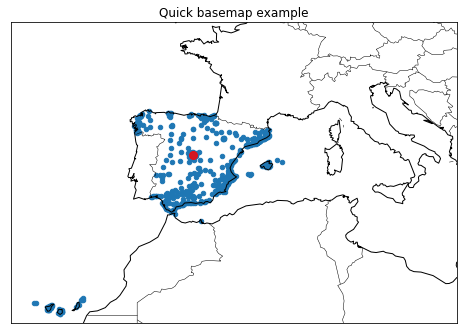

In [28]:
## Plot all the cities in Spain

es = df_cities[df_cities['countrycode'] == 'ES'] # get all cities in spain
# find the continent for ES, then get the bounding box for that to use in the map
countries['ES']['continentcode']
bounds = continents[countries['ES']['continentcode']]['bbox']

# Multiple cities named Madrid...finding the correct programmatically will be saved for later
MadLat = 40.4165
MadLon = -3.70256


# Basemap has many projections...this one is Miller
fig = plt.figure(figsize=(8,8))

# Full map: -90, +90, -180, +180
if (0):
    # llcrnrlat = -60 to trim out Antarctica
    m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
           llcrnrlon = -180, urcrnrlon=180,resolution='l') 
# Full map of Europe:
#m = Basemap(projection='mill',llcrnrlat=bounds['south'],urcrnrlat=bounds['north'],\
#           llcrnrlon = bounds['west'], urcrnrlon=bounds['east'],resolution='l') 
# Zooming in on Spain...
if (1):
    m = Basemap(projection='mill',llcrnrlat=27,urcrnrlat=50,\
           llcrnrlon = -20, urcrnrlon=20,resolution='l') 
# resolution: crude, low, high

m.drawcoastlines()
m.drawcountries()
#m.drawstates()
#m.drawrivers()
#m.fillcontinents(color='#04bae3',lake_color='#FFFCCC') # #072b57 = dark blue
#m.drawmapboundary(fill_color='#FFFFFF')
#m.bluemarble() # makes it look like a view from space -- nice coloring of land, water, glaciers

# Most cities
latitude = list(es['latitude'])
longitude = list(es['longitude'])
m.scatter(longitude, latitude, latlon=True, s=20)

# Capital
x,y = m(MadLon,MadLat)        # note that above the function took Long, Lat and converted to x, y plotting; here
                              # we need to that ourselves
#print("what are x, and y? {} {}".format(x,y))
m.plot(x,y,'ro',markersize=8, alpha=0.8)



plt.title('Quick basemap example')
plt.show()

### Case 2 - City names that are confusing for English text analysis

In [29]:
#gc.get_cities()['4930956']        Accessed by geonameid 
list_of_tricky_names = ['Of','Gap','Boom','Hit','Can','Man','Goes','Come','Bay','Spring','Borne','Buy',\
                    'Bury','Bra','Papa']

# The problem with this approach is that the names have not been run through unidecode
for c in list_of_tricky_names:   
    ng = gc.get_cities_by_name(c)   #Accessed by city name; returns a list of dictionaries
    if (ng):
        for k in ng[0]:
            print("{}: population {}, lat {} long {}".format(ng[0][k]['name'],\
                                                         ng[0][k]['population'],\
                                                         ng[0][k]['latitude'],\
                                                         ng[0][k]['longitude']))

# Note that some are MISSING! "Hit" and "Can" actual have special characters.

Of: population 31951, lat 40.94055 long 40.25918
Gap: population 42715, lat 44.55858 long 6.07868
Boom: population 15810, lat 51.09242 long 4.3717
Man: population 139341, lat 7.41251 long -7.55383
Goes: population 36931, lat 51.50417 long 3.88889
Bay: population 33547, lat 14.18368 long 121.28554
Spring: population 54298, lat 30.07994 long -95.41716
Borne: population 20550, lat 52.30136 long 6.7482
Buy: population 26486, lat 58.48067 long 41.53699
Bury: population 61044, lat 53.6 long -2.3
Bra: population 24072, lat 44.69776 long 7.85128


In [30]:
# An easier option is to use the DataFrame with the modified names

df_cities[df_cities['name'].apply(lambda x: True if x in list_of_tricky_names else False)]

,geonameid,name,latitude,longitude,countrycode,population,timezone,admin1code,simple_name
2801494,2801494,Boom,51.0924,4.3717,BE,15810,Europe/Brussels,VLG,Boom
2284647,2284647,Man,7.41251,-7.55383,CI,139341,Africa/Abidjan,78,Man
3016702,3016702,Gap,44.5586,6.07868,FR,42715,Europe/Paris,93,Gap
2654187,2654187,Bury,53.6,-2.3,GB,61044,Europe/London,ENG,Bury
3181631,3181631,Bra,44.6978,7.85128,IT,24072,Europe/Rome,12,Bra
2755476,2755476,Goes,51.5042,3.88889,NL,36931,Europe/Amsterdam,10,Goes
2758598,2758598,Borne,52.3014,6.7482,NL,20550,Europe/Amsterdam,15,Borne
1725919,1725919,Bay,14.1837,121.286,PH,33547,Asia/Manila,40,Bay
570508,570508,Buy,58.4807,41.537,RU,26486,Europe/Moscow,37,Buy
741240,741240,Of,40.9406,40.2592,TR,31951,Europe/Istanbul,61,Of


In [31]:
# One option is to drop all of these since they are smaller cities and these words can turn up for other reasons, 
# such as "Spring break" or "mosquito-borne"

In [32]:
## For offline sleuthing
df_cities.to_csv('geonamescache_complete_cities.csv')